IA & Data science (LU3IN0226) -- 2021-2022
--------
*&copy; Equipe pédagogique: Vincent Guigue, Christophe Marsala, Olivier Schwander.*

<font size="+1" color="RED"><b>[Q]</b></font> <font size="+1"><b>Indiquer dans la boîte ci-dessous vos noms et prénoms :</b></font>

BESSAD Melina & KLICH NourElHouda

<b>Ce projet peut être fait en binôme (et c'est fortement conseillé) ou tout seul.</b>
Le nom de chaque membre du binôme doit être indiqué, et un seul rendu sur un des deux comptes Moodle doit être fait.

<b>Les groupes de plus de 2 personnes ne sont pas autorisés.</b>

<font color="RED" size="+1"><b>[Q]</b></font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>projet-2</tt> et rajouter à la suite de <tt>projet-2</tt> les noms des membres du binômes séparés par un tiret.

<font color="RED" size="+1">IMPORTANT: soumission de votre fichier final</font>

**Nom à donner au notebook** : *projet-2-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme

**Le compte-rendu doit être rendu sur la page Moodle.**

# Projet 2 - avril-mai 2022


<font size="+1" color="RED"><b>Date de rendu : lundi 9 mai, 19h au plus tard</b></font>
    
(<b>attention! le site Moodle ferme à 19h pile !</b> prévoyez de vous y connecter au moins 15mn avant la fermeture...)


Vous devez compléter ce notebook en rajoutant vos expérimentations avec vos algorithmes d'apprentissage sur les données Agribalise qui sont des données ouvertes dont la documentation peut être consultée ici : https://doc.agribalyse.fr/documentation/acces-donnees

Très important : les fichiers de données doivent être placés de façon à respecter la structure de fichiers suivante :

          --iads/
              -- Classifiers.py
              -- etc.
          -- projet/
              -- ce_notebook.ipynb
              -- Donnees_Agribalyse/
                  -- detail_ingredient.csv
                  -- detail_etape.csv
                  -- synthese.csv

Dans le notebook, le chargement des fichiers de données considèrera donc cette arborescence.

## Travail à faire

Appliquer les algorithmes d'apprentissage vus tout au long du semestre sur les données afin de mettre en évidence des résultats intéressants.
Deux problèmes, au moins, doivent être traités:
- un problème d'apprentissage supervisé
- un problème d'apprentissage non supervisé


## Travail à rendre
Ce qui doit être remis avant la date limite : un fichier archive (`.tar`, `.tgz`, ou `.zip` uniquement) contenant:
- ce notebook complété. Il doit pouvoir être exécuté sans autre apport (pensez à vous en assurer avant de le rendre). 
- votre librairie iads sous la forme d'une archive du répertoire iads/
- un fichier PDF dont le nom est de la forme: *projet-1-Nom1_Nom2.pdf* qui correspond à un poster décrivant l'ensemble des expérimentations menées et les résultats obtenus.


<b>IMPORTANT</b>: Les fichiers de données ne doivent pas être inclus dans votre archive !

## Soutenance des projets
La soutenance sera organisée après la semaine d'examens de mai entre le 17 et le 25 mai (la date sera précisé sur le forum du Moodle).

La <b>soutenance est obligatoire</b> : tout projet pour lequel une soutenance n'a pas eu lieu sera noté $0$.

Modalités de la soutenance:
- durée de la soutenance : 10 mn pour un binôme, 7 mn pour un monôme ;
- elle a lieu devant un ordinateur avec le notebook et le poster comme support ;
    - elle commence par une rapide présentation des expérimentations réalisées et résultats obtenus (max. 4 à 5mns)
    - puis elle se poursuit par des questions posées individuellement aux membres du binômes sur les expériences ou le code python réalisé.
- la note de soutenance est individuelle pour chaque membre d'un binôme.




## Exemples

In [43]:
# Importation des librairies standards:
import numpy as np
import pandas as pd
import graphviz as gv
import matplotlib.pyplot as plt
import sklearn.manifold as man
%matplotlib inline  

# Importation de votre librairie iads:
# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')   # iads doit être dans le répertoire frère du répertoire courant !

# Importation de la librairie iads
import iads as iads

# importation de Classifiers
from iads import Classifiers as cl

# importation de utils
from iads import utils as ut

# importation de Clustering
from iads import Clustering as clust

# importation de Kmeans
from iads import Kmeans as Km

# commande TRES utile pour recharger automatiquement le code que vous modifiez dans les modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [44]:
data_synthese = pd.read_csv("Donnees_Agribalyse/synthese.csv")
data_synthese.columns
print("Nombre de lignes: ",len(data_synthese))

Nombre de lignes:  2479


In [45]:
data_synthese.loc[0:5]

,Code AGB,Code CIQUAL,Groupe d'aliment,Sous-groupe d'aliment,Nom du Produit en Français,LCI Name,Saisonnalité,Transport par avion (1 : par avion),Livraison,Matériau d'emballage,...,Particules (E-06 disease inc./kg de produit),Acidification terrestre et eaux douces (mol H+ eq/kg de produit),Eutrophisation terreste (mol N eq/kg de produit),Eutrophisation eaux douces (E-03 kg P eq/kg de produit),Eutrophisation marine (E-03 kg N eq/kg de produit),Utilisation du sol (Pt/kg de produit),Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit),Épuisement des ressources eau (m3 depriv./kg de produit),Épuisement des ressources énergétiques (MJ/kg de produit),Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit)
0,13712,13712,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop léger, appertisé, égoutté","Apricot, canned in light syrup, drained",mix de consommation FR,0,Ambiant (moyenne),Acier,...,0.096413,0.009301,0.031766,0.410555,1.502775,44.823181,62.195218,1.630637,47.237697,2.938064
1,13713,13713,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop léger, appertisé, non égoutté","Apricot, canned in light syrup, not drained",mix de consommation FR,0,Ambiant (moyenne),Acier,...,0.059314,0.005726,0.019499,0.235366,0.797791,27.901738,36.285914,1.010960,29.397697,1.823726
2,13714,13714,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop, appertisé, égoutté","Apricot, in syrup, canned, drained",mix de consommation FR,0,Ambiant (moyenne),Acier,...,0.096413,0.009301,0.031766,0.410555,1.502775,44.823181,62.195218,1.630637,47.237697,2.938064
3,13715,13715,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop, appertisé, non égoutté","Apricot, in syrup, canned, not drained",mix de consommation FR,0,Ambiant (moyenne),Acier,...,0.059314,0.005726,0.019499,0.235366,0.797791,27.901738,36.285914,1.010960,29.397697,1.823726
4,13000,13000,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot, dénoyauté, cru","Apricot, pitted, raw",mix de consommation FR,0,Ambiant (moyenne),LPDE,...,0.061462,0.007254,0.025954,0.204244,0.943669,43.838644,41.957928,1.412878,17.123820,2.173328
5,13001,13001,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot, dénoyauté, sec","Apricot, pitted, dried",mix de consommation FR,0,Ambiant (moyenne),LPDE,...,0.315730,0.041668,0.156978,1.036479,4.955795,248.627750,260.488540,7.717328,184.622520,11.016019


In [46]:
data_ingredient = pd.read_csv("Donnees_Agribalyse/detail_ingredient.csv")
data_ingredient.columns
print("Nombre de lignes: ",len(data_ingredient))

Nombre de lignes:  5671


In [47]:
data_ingredient.loc[0:5]

,Ciqual AGB,Ciqual code,Nom Français,Groupe d'aliment,Sous-groupe d'aliment,LCI Name,Ingredients,Score unique EF (mPt/kg de produit),Changement climatique (kg CO2 eq/kg de produit),Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit),...,Particules (E-06 disease inc./kg de produit),Acidification terrestre et eaux douces (mol H+ eq/kg de produit),Eutrophisation terreste (mol N eq/kg de produit),Eutrophisation eaux douces (E-03 kg P eq/kg de produit),Eutrophisation marine (E-03 kg N eq/kg de produit),Utilisation du sol (Pt/kg de produit),Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit),Épuisement des ressources eau (m3 depriv./kg de produit),Épuisement des ressources énergétiques (MJ/kg de produit),Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit)
0,11168,11168,"Sauce aïoli, préemballée",aides culinaires et ingrédients divers,sauces,"Aioli sauce (garlic and olive oil mayonnaise),...",Jaune d'œuf,0.039743,0.164754,0.014089,...,0.046616,0.006761,0.029441,0.052027,1.329230,16.984964,7.404112,0.337769,1.475548,0.251356
1,11168,11168,"Sauce aïoli, préemballée",aides culinaires et ingrédients divers,sauces,"Aioli sauce (garlic and olive oil mayonnaise),...",Ail,0.004417,0.011444,0.002512,...,0.000781,0.000105,0.000328,0.004760,0.189983,1.643787,1.216336,0.291209,0.229937,0.084028
2,11168,11168,"Sauce aïoli, préemballée",aides culinaires et ingrédients divers,sauces,"Aioli sauce (garlic and olive oil mayonnaise),...",Jus de citron,0.019375,0.061230,0.007842,...,0.006365,0.000951,0.003573,0.016918,0.213721,3.707242,2.625043,1.445978,0.793865,0.203959
3,11168,11168,"Sauce aïoli, préemballée",aides culinaires et ingrédients divers,sauces,"Aioli sauce (garlic and olive oil mayonnaise),...",Huile d'olive,0.445364,1.161825,0.136467,...,0.142041,0.021524,0.088459,0.554361,9.263219,7.579606,464.100950,9.374618,12.100965,4.424012
4,11168,11168,"Sauce aïoli, préemballée",aides culinaires et ingrédients divers,sauces,"Aioli sauce (garlic and olive oil mayonnaise),...",Autres étapes,0.080761,0.571172,0.126768,...,0.024611,0.002630,0.008368,0.090374,1.295442,4.529954,11.433712,0.759522,22.626111,1.278583
5,24664,24664,Gâteau aux amandes type financier,produits céréaliers,gâteaux et pâtisseries,Almond cake,Amande,0.349367,0.914647,0.070591,...,0.098041,0.012824,0.046970,0.406947,4.767077,64.110420,49.548089,27.024469,11.359491,8.104749


In [48]:
data_etape = pd.read_csv("Donnees_Agribalyse/detail_etape.csv")
data_etape.columns
print("Nombre de lignes: ",len(data_etape))


Nombre de lignes:  2480


In [49]:
data_etape.loc[0:5]

,Code AGB,Code CIQUAL,Groupe d'aliment,Sous-groupe d'aliment,Nom du Produit en Français,LCI Name,DQR,Nom et code,Score unique EF (mPt / kg de produit) - Agriculture,Score unique EF (mPt / kg de produit) - Transformation,...,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Agriculture,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Transformation,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Emballage,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Transport,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Supermarché et distribution,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Consommation,DQR - P,DQR - TiR,DQR - GR,DQR - TeR
0,12112,12112,lait et produits laitiers,fromages,Abondance,"Abondance cheese, from cow's milk",2.24,Abondance (12112),0.470679,0.046274,...,2.855985,0.552672,0.108718,0.985193,0.148203,0.042714,2.84,2.05,1.18,2.87
1,13712,13712,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop léger, appertisé, égoutté","Apricot, canned in light syrup, drained",2.46,"Abricot au sirop léger, appertisé, égoutté (13...",0.061297,0.075215,...,1.281828,0.477989,0.220289,0.679414,0.263117,0.015426,2.25,3.62,1.96,2.01
2,13713,13713,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop léger, appertisé, non égoutté","Apricot, canned in light syrup, not drained",2.46,"Abricot au sirop léger, appertisé, non égoutté...",0.038249,0.046934,...,0.799861,0.298265,0.137461,0.423954,0.164185,0.000000,2.25,3.62,1.96,2.01
3,13714,13714,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop, appertisé, égoutté","Apricot, in syrup, canned, drained",2.46,"Abricot au sirop, appertisé, égoutté (13714)",0.061297,0.075215,...,1.281828,0.477989,0.220289,0.679414,0.263117,0.015426,2.25,3.62,1.96,2.01
4,13715,13715,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop, appertisé, non égoutté","Apricot, in syrup, canned, not drained",2.44,"Abricot au sirop, appertisé, non égoutté (13715)",0.038249,0.046934,...,0.799861,0.298265,0.137461,0.423954,0.164185,0.000000,2.21,3.65,1.92,1.97
5,13000,13000,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot, dénoyauté, cru","Apricot, pitted, raw",2.20,"Abricot, dénoyauté, cru (13000)",0.061101,0.000000,...,1.277733,0.000000,0.150130,0.533833,0.205231,0.006400,1.96,3.54,1.66,1.66


# 1- Apprentissage supervisé :

### Problématique:

* Peut-on prédire la note de qualité (DQR) des aliments de notre base de données à partir des indicateurs environnementaux?

## 1.1 - Classification binaire : 

Commençons par un cas binaire simple, ou l'on va prédire la note de qualité (DQR) des aliments. Un aliment peut avoir une note entre 1 et 5. Si la note est inférieure ou égale à 3, l'aliment est de bonne qualité et sa classe est donc de 1, sinon il est de mauvaise qualité et sa classe est donc de -1.                                                                                                           Pour ce faire, nous allons utiliser les indicateurs de la table Synthèse qui nous permettront de trouver la note de qualité de chaque aliment.

In [50]:
cols = list(data_synthese)[12:]#on prend tous les attributs numériques

data = data_synthese[cols]
label = data_synthese["DQR - Note de qualité de la donnée (1 excellente ; 5 très faible)"]

X = np.array(data)
Y = np.array(label)

#encore les DQR <=3 à 1 et le reste à -1
Y[np.where(Y<=3)[0]] = 1
Y[np.where(Y>3)[0]] = -1



#### Représentation des données :


In [51]:
data

,Score unique EF (mPt/kg de produit),Changement climatique (kg CO2 eq/kg de produit),Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit),Rayonnements ionisants (kBq U-235 eq/kg de produit),Formation photochimique d'ozone (E-03 kg NMVOC eq/kg de produit),Particules (E-06 disease inc./kg de produit),Acidification terrestre et eaux douces (mol H+ eq/kg de produit),Eutrophisation terreste (mol N eq/kg de produit),Eutrophisation eaux douces (E-03 kg P eq/kg de produit),Eutrophisation marine (E-03 kg N eq/kg de produit),Utilisation du sol (Pt/kg de produit),Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit),Épuisement des ressources eau (m3 depriv./kg de produit),Épuisement des ressources énergétiques (MJ/kg de produit),Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit)
0,0.215366,1.221121,0.248176,1.820853,4.658414,0.096413,0.009301,0.031766,0.410555,1.502775,44.823181,62.195218,1.630637,47.237697,2.938064
1,0.128043,0.612234,0.153879,1.135915,2.784663,0.059314,0.005726,0.019499,0.235366,0.797791,27.901738,36.285914,1.010960,29.397697,1.823726
2,0.215366,1.221121,0.248176,1.820853,4.658414,0.096413,0.009301,0.031766,0.410555,1.502775,44.823181,62.195218,1.630637,47.237697,2.938064
3,0.128043,0.612234,0.153879,1.135915,2.784663,0.059314,0.005726,0.019499,0.235366,0.797791,27.901738,36.285914,1.010960,29.397697,1.823726
4,0.118929,0.861730,0.089663,0.298539,3.065576,0.061462,0.007254,0.025954,0.204244,0.943669,43.838644,41.957928,1.412878,17.123820,2.173328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2474,0.351296,2.441307,0.789900,0.768965,4.916249,0.173049,0.022129,0.092536,0.257436,15.198522,136.090810,216.954380,2.253106,26.865322,5.020883
2475,0.239814,2.441674,0.157775,0.774114,4.598111,0.155803,0.022678,0.095881,0.235488,13.642379,133.154710,24.979408,0.636518,25.746521,1.838004
2476,0.239814,2.441674,0.157775,0.774114,4.598111,0.155803,0.022678,0.095881,0.235488,13.642379,133.154710,24.979408,0.636518,25.746521,1.838004
2477,0.260504,2.654791,0.178569,0.776860,5.091263,0.165113,0.023417,0.097687,0.297081,14.777646,138.486420,32.692803,0.862339,27.136623,2.858934


### Perceptron:

In [52]:
###EXtraction des données binaires de validation croisée
np.random.seed(42)   # on prend 42 comme graine

index = np.random.permutation(len(X)) # mélange des index
XbinMelange = X[index]
YbinMelange = Y[index]


In [53]:
niter = 10
acc_vc_perc=[]
learning_rate=0.001
DQR_moyen = 0
for i in range(1,niter):
    perceptron1 = cl.ClassifierPerceptron(15,learning_rate)
    Xapp,Yapp,X_test,Y_test = ut.crossval_strat(XbinMelange, YbinMelange,niter,i)
    print("-----------------------Itération ",i,"-------------------------")
    print("taille base appretissage = ",len(Xapp)," taille base de test = ",len(X_test))
    perceptron1.train(Xapp, Yapp)
    acc=perceptron1.accuracy(X_test, Y_test)
    print("accuracy test = ",acc)
    acc_vc_perc.append(acc)
       

-----------------------Itération  1 -------------------------
taille base appretissage =  2232  taille base de test =  247
accuracy test =  0.6761133603238867
-----------------------Itération  2 -------------------------
taille base appretissage =  2232  taille base de test =  247
accuracy test =  0.7651821862348178
-----------------------Itération  3 -------------------------
taille base appretissage =  2232  taille base de test =  247
accuracy test =  0.5020242914979757
-----------------------Itération  4 -------------------------
taille base appretissage =  2232  taille base de test =  247
accuracy test =  0.680161943319838
-----------------------Itération  5 -------------------------
taille base appretissage =  2232  taille base de test =  247
accuracy test =  0.7449392712550608
-----------------------Itération  6 -------------------------
taille base appretissage =  2232  taille base de test =  247
accuracy test =  0.7004048582995951
-----------------------Itération  7 -----------

### KNN:

---------------k =  1 ------------------------
Accuracy (test) pour  1 : 0.7575757575757576
---------------k =  3 ------------------------
Accuracy (test) pour  3 : 0.7636363636363637
---------------k =  5 ------------------------
Accuracy (test) pour  5 : 0.7696969696969697
---------------k =  7 ------------------------
Accuracy (test) pour  7 : 0.7757575757575758
---------------k =  9 ------------------------
Accuracy (test) pour  9 : 0.7434343434343434

le meilleur k est donc : 7


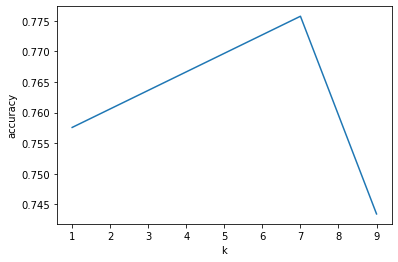

In [54]:
# on stocke les accuracies dans une liste :
accuracies_train = []
accuracies_test = []

# seuil max des valeurs de k à regarder:
seuil_k = 10

#validation croisée 
Xapp,Yapp,X_test,Y_test = ut.crossval(X, Y,5,2)

# toutes les valeurs de k à regarder:
valeurs_k = [k for k in range(1,seuil_k,2)]

for k in valeurs_k:
    # Création d'un knn avec k et 2 dimensions pour les données
    classifierKNN = cl.ClassifierKNN(13,k)
    # Entraînement du classifier:
    classifierKNN.train(Xapp,Yapp)
    # acccuracies pour test
    tmp = classifierKNN.accuracy(X_test,Y_test)
    print("---------------k = ",k,"------------------------")
    print("Accuracy (test) pour ",k,":",tmp)
    accuracies_test.append(tmp)
plt.plot(valeurs_k,accuracies_test)
plt.xlabel("k")
plt.ylabel("accuracy")
k_best=valeurs_k[np.argmax(accuracies_test)]
print("\nle meilleur k est donc :",k_best)

In [55]:
###EXtraction des données binaires de validation croisée
np.random.seed(42)   # on prend 42 comme graine

index = np.random.permutation(len(X)) # mélange des index
XbinMelange = X[index]
YbinMelange = Y[index]


In [56]:
niter = 10
liste_classif = []
acc_vc_knn=[]
for i in range(1,niter):
    Xapp,Yapp,X_test,Y_test = ut.crossval(XbinMelange, YbinMelange,niter,i)
    knn1 = cl.ClassifierKNN(13,k_best)
    print("-----------------------Itération ",i,"-------------------------")
    print("taille base appretissage = ",len(Xapp)," taille base de test = ",len(X_test))
    knn1.train(Xapp, Yapp)
    acc=knn1.accuracy(X_test, Y_test)
    print("accuracy test = ",acc)
    acc_vc_knn.append(acc)

-----------------------Itération  1 -------------------------
taille base appretissage =  2232  taille base de test =  247
accuracy test =  0.7894736842105263
-----------------------Itération  2 -------------------------
taille base appretissage =  2232  taille base de test =  247
accuracy test =  0.8340080971659919
-----------------------Itération  3 -------------------------
taille base appretissage =  2232  taille base de test =  247
accuracy test =  0.7935222672064778
-----------------------Itération  4 -------------------------
taille base appretissage =  2232  taille base de test =  247
accuracy test =  0.8259109311740891
-----------------------Itération  5 -------------------------
taille base appretissage =  2232  taille base de test =  247
accuracy test =  0.7935222672064778
-----------------------Itération  6 -------------------------
taille base appretissage =  2232  taille base de test =  247
accuracy test =  0.7894736842105263
-----------------------Itération  7 ----------

### Comparaison résultats KNN et perceptron:

- On remarque que les performances de prédiction sur les données Agribalyse sont nettement meilleures avec le classifieur KNN qu'avec le Perceptron. Nous choisissons donc le KNN pour étudier la note de qualités des aliments fournis et vérifier si nos résultats sont compatibles avec ceux de la notice(67% des données sont de bonne qualité c'est à dire de classe 1).

In [57]:
niter = 10
liste_classif = []
DQR_moy  = 0
for i in range(1,niter):
    Xapp,Yapp,X_test,Y_test = ut.crossval(XbinMelange, YbinMelange,niter,i)
    knn1 = cl.ClassifierKNN(13,k_best)
    print("-----------------------Itération ",i,"-------------------------")
    print("taille base appretissage = ",len(Xapp)," taille base de test = ",len(X_test))
    knn1.train(Xapp, Yapp)
    label_res = []
    for i in range(len(X_test)):
        label_res.append(knn1.predict(X_test[i]))#on predit les classes
    values, counts = np.unique(label_res, return_counts=True)
    DQR_moy += counts[1]/len(X_test)
    print("Le pourcentage des aliments de bonne qualité est : ",counts[1]/len(X_test)*100,"%")
print("\nLe pourcentage moyen des aliments de bonne qualité est ",DQR_moy/niter*100,"%")


-----------------------Itération  1 -------------------------
taille base appretissage =  2232  taille base de test =  247
Le pourcentage des aliments de bonne qualité est :  65.58704453441295 %
-----------------------Itération  2 -------------------------
taille base appretissage =  2232  taille base de test =  247
Le pourcentage des aliments de bonne qualité est :  71.25506072874494 %
-----------------------Itération  3 -------------------------
taille base appretissage =  2232  taille base de test =  247
Le pourcentage des aliments de bonne qualité est :  70.04048582995951 %
-----------------------Itération  4 -------------------------
taille base appretissage =  2232  taille base de test =  247
Le pourcentage des aliments de bonne qualité est :  73.68421052631578 %
-----------------------Itération  5 -------------------------
taille base appretissage =  2232  taille base de test =  247
Le pourcentage des aliments de bonne qualité est :  66.80161943319838 %
-----------------------It

- **Résultats trouvés**: On remarque que le pourcentage moyen des aliments de bonne qualité dans notre base de données Agribalyse prédit avec notre algorithme le KNN **(63,28%)** concorde avec les résultats indiqués sur la documentation **(67%)**


## Classification multi-classes:

- A présent nous allons essayer de spécifier un peu plus la note de qualité de nos aliments. Pour cela nous allons prédire les 04 classes (les intervalles) précisant le niveau de qualité des aliments allant de 1 très bon à 5 mauvais.

In [58]:
cols = list(data_synthese)[12:]#on prend tous les attributs numériques

data = data_synthese[cols]
label = data_synthese["DQR - Note de qualité de la donnée (1 excellente ; 5 très faible)"]

X_multi = np.array(data)
Y_multi = np.array(label)

#encore les DQR 
Y_multi[np.where((1<Y_multi) & (Y_multi<=2))[0]] = 1
Y_multi[np.where((2<Y_multi) & (Y_multi<=3))[0]] = 2
Y_multi[np.where((3<Y_multi) & (Y_multi<=4))[0]] = 3
Y_multi[np.where((4<Y_multi) & (Y_multi<=5))[0]] = 4


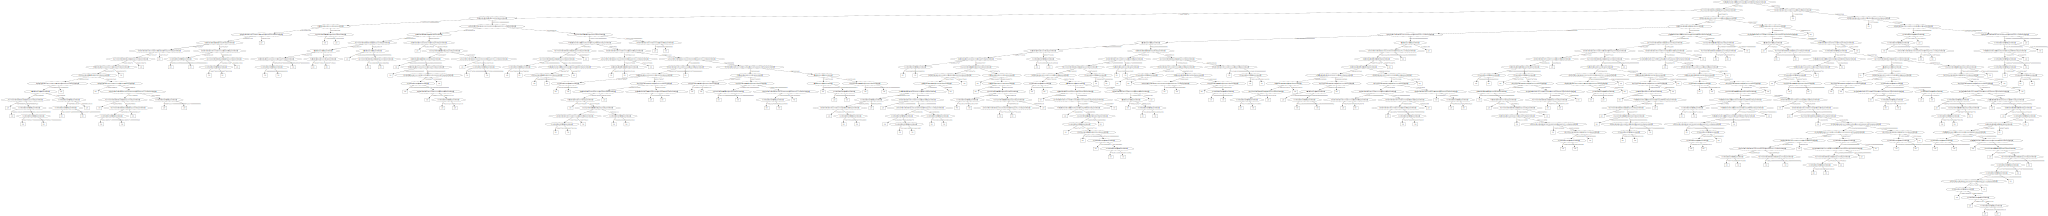

In [59]:
# Initialiation d'un arbre pour le dataset Elections:
arbre_num = cl.ClassifierArbreNumerique(len(cols), 0.25, cols)

# Construction de l'arbre de décision à partir du dataset Elections
arbre_num.train(X_multi,Y_multi)

# Construction de la représentation graphique (affichage)
gr_arbre_num = gv.Digraph(format='png')
arbre_num.affiche(gr_arbre_num)

# Affichage du graphe obtenu:
gr_arbre_num

In [60]:
# mesure du taux de bonne classification
arbre_num.accuracy(X_multi,Y_multi)

0.926986688180718

In [61]:
np.random.seed(42)   # on prend 42 comme graine

index = np.random.permutation(len(X_multi)) # mélange des index
XbinMelange = X_multi[index]
YbinMelange = Y_multi[index]


In [62]:
DQR_moy = 0
niter = 5
for i in range(1,niter):
    Xapp,Yapp,X_test,Y_test = ut.crossval(XbinMelange, YbinMelange,niter,i)
    arbre_num = cl.ClassifierArbreNumerique(len(cols), 0.25, cols)
    print("-----------------------Itération ",i,"-------------------------")
    print("taille base appretissage = ",len(Xapp)," taille base de test = ",len(X_test))
    arbre_num.train(Xapp,Yapp)
    label_res = []
    for i in range(len(X_test)):
        label_res.append(arbre_num.predict(X_test[i]))#on predit les classes
    values, counts = np.unique(label_res, return_counts=True)
    DQR_moy += sum(counts[:2])/len(X_test)
    print("Le pourcentage des aliments de bonne qualité est : ",sum(counts[:2])/len(X_test)*100,"%")
print("\nLe pourcentage moyen des aliments de bonne qualité est ",DQR_moy/(niter-1)*100,"%")


-----------------------Itération  1 -------------------------
taille base appretissage =  1984  taille base de test =  495
Le pourcentage des aliments de bonne qualité est :  72.32323232323232 %
-----------------------Itération  2 -------------------------
taille base appretissage =  1984  taille base de test =  495
Le pourcentage des aliments de bonne qualité est :  70.5050505050505 %
-----------------------Itération  3 -------------------------
taille base appretissage =  1984  taille base de test =  495
Le pourcentage des aliments de bonne qualité est :  73.13131313131314 %
-----------------------Itération  4 -------------------------
taille base appretissage =  1984  taille base de test =  495
Le pourcentage des aliments de bonne qualité est :  69.4949494949495 %

Le pourcentage moyen des aliments de bonne qualité est  71.36363636363636 %


- **Résultats trouvés**: 
On remarque que le pourcentage moyen des aliments de bonne qualité (les classes 1 et 2) dans notre base de données Agribalyse  prédit avec notre arbre de décision est de 71% en moyenne ce qui concorde avec les résultats indiqués sur la documentation (67%). 
Deplus le taux de bonne classification est de 92,7% , ce qui nous permet de dire que le classifieur d'arbre de décision est efficace sur ces données et que les attributs choisis sont suffisamment discriminants.



Comme on l'a vu ci-dessus l'arbre de classification de tous les aliments est illisible. On va donc nous contenter de prédire les notes de qualités des aliments d'un seul groupe. Pour ce faire d'abord, on cherche les groupes ayant un nombre raisonnables d'aliments (que l'on peut afficher). Pour cela, on compte à l'aide du dataframe data_synthèse, le nombre d'aliments pour chaque groupe. En triant par le nombre d'aliments, on peut ainsi avoir la liste des groupes et le nombre d'aliments qu'ils contiennent.

In [63]:
####extraction des données

dfTemp = data_synthese.groupby("Groupe d'aliment")["Code AGB"].count().reset_index()
dfTemp = dfTemp.rename({"Code AGB":"nbAliments"},axis = 1)
dfTemp.sort_values("nbAliments",ascending = False)

,Groupe d'aliment,nbAliments
10,"viandes, œufs, poissons",636
4,"fruits, légumes, légumineuses et oléagineux",423
8,produits céréaliers,375
3,entrées et plats composés,281
6,lait et produits laitiers,220
2,boissons,219
0,aides culinaires et ingrédients divers,158
7,matières grasses,56
9,produits sucrés,53
1,aliments infantiles,33


Le groupe *produits sucrés* nous semble raisonnable.

In [64]:
######extraire les aliments du groupe aides culinaires et ingrédients divers
cols = list(data_synthese)[11:]#on prend tous les attributs numériques
data = data_synthese[cols]

dataArbre = data[data_synthese["Groupe d'aliment"]=="produits sucrés"].reset_index()
labelArbre = dataArbre["DQR - Note de qualité de la donnée (1 excellente ; 5 très faible)"]
del dataArbre["DQR - Note de qualité de la donnée (1 excellente ; 5 très faible)"]
del dataArbre["index"]
dataArbre.head(10)


,Score unique EF (mPt/kg de produit),Changement climatique (kg CO2 eq/kg de produit),Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit),Rayonnements ionisants (kBq U-235 eq/kg de produit),Formation photochimique d'ozone (E-03 kg NMVOC eq/kg de produit),Particules (E-06 disease inc./kg de produit),Acidification terrestre et eaux douces (mol H+ eq/kg de produit),Eutrophisation terreste (mol N eq/kg de produit),Eutrophisation eaux douces (E-03 kg P eq/kg de produit),Eutrophisation marine (E-03 kg N eq/kg de produit),Utilisation du sol (Pt/kg de produit),Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit),Épuisement des ressources eau (m3 depriv./kg de produit),Épuisement des ressources énergétiques (MJ/kg de produit),Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit)
0,0.409825,4.726575,0.283479,0.694606,9.030596,0.169704,0.022804,0.087790,0.619277,16.599729,58.826091,141.68835,5.208565,29.386406,4.938950
1,0.409825,4.726575,0.283479,0.694606,9.030596,0.169704,0.022804,0.087790,0.619277,16.599729,58.826091,141.68835,5.208565,29.386406,4.938950
2,0.409825,4.726575,0.283479,0.694606,9.030596,0.169704,0.022804,0.087790,0.619277,16.599729,58.826091,141.68835,5.208565,29.386406,4.938950
3,0.677635,8.301959,0.382672,0.852376,15.071458,0.390342,0.053217,0.215202,1.070912,27.122991,186.548470,161.64829,5.217057,43.480856,8.443223
4,0.579018,7.141387,0.329924,0.733926,12.577087,0.342732,0.044957,0.184997,0.841083,23.833733,191.997930,140.09106,4.315075,33.421126,7.684526
5,0.673096,8.134868,0.391066,0.842663,14.741685,0.391406,0.052827,0.215043,1.075914,27.170938,190.095490,174.34940,5.054940,39.883295,8.545815
6,0.673096,8.134868,0.391066,0.842663,14.741685,0.391406,0.052827,0.215043,1.075914,27.170938,190.095490,174.34940,5.054940,39.883295,8.545815
7,0.673096,8.134868,0.391066,0.842663,14.741685,0.391406,0.052827,0.215043,1.075914,27.170938,190.095490,174.34940,5.054940,39.883295,8.545815
8,1.207213,13.164123,0.642297,1.083523,25.187316,0.515110,0.069999,0.270839,1.928533,42.658307,229.743030,328.31891,27.419244,64.009848,18.023403
9,0.915678,2.911573,0.269864,0.736061,13.259803,0.311822,0.041145,0.154455,1.101564,14.938437,167.446000,130.83173,62.042213,47.698999,19.655344


In [65]:
X_a = np.array(dataArbre)
Y_a = np.array(labelArbre)

#encore les DQR 
Y_a[np.where((1<Y_a) & (Y_a<=2))[0]] = 1
Y_a[np.where((2<Y_a) & (Y_a<=3))[0]] = 2
Y_a[np.where((3<Y_a) & (Y_a<=4))[0]] = 3
Y_a[np.where((4<Y_a) & (Y_a<=5))[0]] = 4

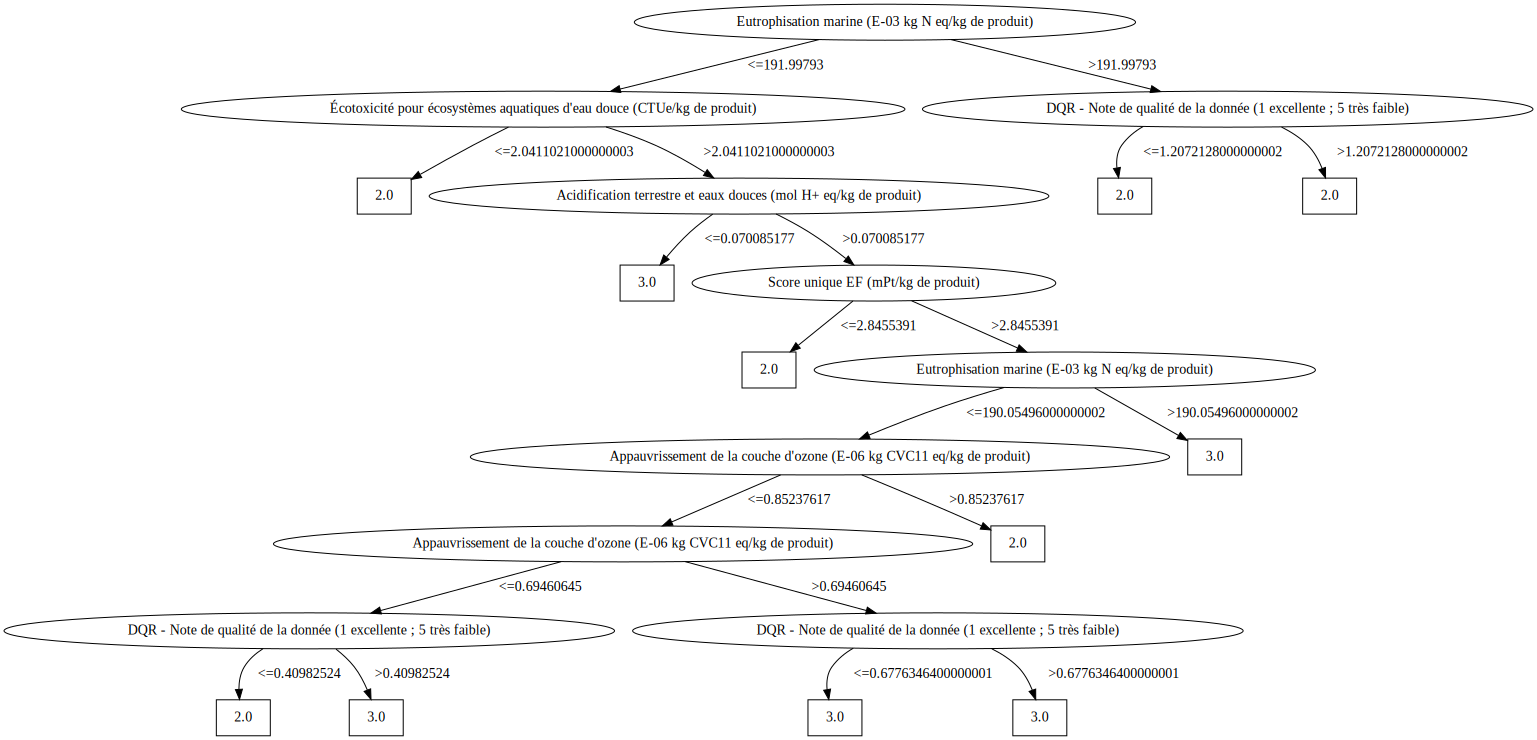

In [66]:
# Initialiation d'un arbre pour le dataset Elections:
arbre_g = cl.ClassifierArbreNumerique(len(cols), 0.25, cols)

# Construction de l'arbre de décision à partir du dataset Elections
arbre_g.train(X_a,Y_a)

# Construction de la représentation graphique (affichage)
gr_arbre_g = gv.Digraph(format='png')
arbre_g.affiche(gr_arbre_g)

# Affichage du graphe obtenu:
gr_arbre_g

# 2 - Apprentissage non-supervisé : 

## 2.1 - K-moyennes : 

Pour la catégorisation non-supervisée, on a décidé de catégoriser les aliments d'un groupe d'aliments. En effet, les méthodes de catégorisation étant typiquement assez lentes, il est difficile en pratique de les appliquer sur des grandes bases de données. En restreignant la base de données aux aliments d'un même groupe, on a un ensebmle plus petit qui peut déjè donner assez d'informations, par exemple, sur la note de qualité (DQR), le score EF, les indicateurs environnementaux. 
Afin d'avoir des résultats intéréssants, on cherche les groupes ayant plusieurs aliments. pour cela, on compte à l'aide du dataframe *data_synthèse*, le nombre d'aliments pour chaque groupe. En triant par le nombre d'aliments, on peut ainsi avoir la liste des groupes qui ont le plus grand nombre d'aliments.

In [67]:
####extraction des données

dfTemp = data_synthese.groupby("Groupe d'aliment")["Code AGB"].count().reset_index()
dfTemp = dfTemp.rename({"Code AGB":"nbAliments"},axis = 1)
dfTemp.sort_values("nbAliments",ascending = False)

,Groupe d'aliment,nbAliments
10,"viandes, œufs, poissons",636
4,"fruits, légumes, légumineuses et oléagineux",423
8,produits céréaliers,375
3,entrées et plats composés,281
6,lait et produits laitiers,220
2,boissons,219
0,aides culinaires et ingrédients divers,158
7,matières grasses,56
9,produits sucrés,53
1,aliments infantiles,33


- On choisit le groupe *aides culinaires et ingrédients divers* qui a 158 aliments. 

In [68]:
######extraire les aliments du groupe aides culinaires et ingrédients divers
cols = list(data_synthese)[11:]#on prend tous les attributs numériques
data = data_synthese[cols]

dataKmeans = data[data_synthese["Groupe d'aliment"]=="aides culinaires et ingrédients divers"].reset_index()

del dataKmeans["index"]

dataKmeans.head(10)

,DQR - Note de qualité de la donnée (1 excellente ; 5 très faible),Score unique EF (mPt/kg de produit),Changement climatique (kg CO2 eq/kg de produit),Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit),Rayonnements ionisants (kBq U-235 eq/kg de produit),Formation photochimique d'ozone (E-03 kg NMVOC eq/kg de produit),Particules (E-06 disease inc./kg de produit),Acidification terrestre et eaux douces (mol H+ eq/kg de produit),Eutrophisation terreste (mol N eq/kg de produit),Eutrophisation eaux douces (E-03 kg P eq/kg de produit),Eutrophisation marine (E-03 kg N eq/kg de produit),Utilisation du sol (Pt/kg de produit),Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit),Épuisement des ressources eau (m3 depriv./kg de produit),Épuisement des ressources énergétiques (MJ/kg de produit),Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit)
0,2.99,1.252575,6.547801,1.893094,12.256417,34.820858,0.701238,0.098439,0.116177,2.240995,11.705482,21.750919,157.987250,4.925442,341.429410,30.229683
1,4.11,0.130138,0.820998,0.176673,0.640934,3.062845,0.081237,0.006423,0.012381,0.185319,2.451463,21.181705,23.335265,2.865276,23.094722,2.862033
2,3.54,0.072152,0.374743,0.074829,0.275404,1.048754,0.018196,0.001681,0.004762,0.088977,2.197838,18.739580,17.000123,3.191428,8.998751,1.458725
3,3.75,0.144840,0.953486,0.085499,0.270474,2.864711,0.070628,0.008793,0.032719,0.230663,4.127382,37.282389,14.959606,5.510321,16.416961,2.046226
4,2.99,1.252575,6.547801,1.893094,12.256417,34.820858,0.701238,0.098439,0.116177,2.240995,11.705482,21.750919,157.987250,4.925442,341.429410,30.229683
5,2.99,1.252575,6.547801,1.893094,12.256417,34.820858,0.701238,0.098439,0.116177,2.240995,11.705482,21.750919,157.987250,4.925442,341.429410,30.229683
6,2.89,0.403902,4.004718,0.332256,0.779629,8.019149,0.238900,0.028434,0.109326,0.795924,17.162321,155.720780,111.277620,2.750541,34.521292,10.681248
7,3.19,0.165126,0.773535,0.160234,0.719493,3.094187,0.057950,0.006676,0.024349,0.219972,2.829242,3.283388,86.376320,3.103372,23.878455,5.278479
8,3.75,0.144840,0.953486,0.085499,0.270474,2.864711,0.070628,0.008793,0.032719,0.230663,4.127382,37.282389,14.959606,5.510321,16.416961,2.046226
9,3.75,0.168086,1.011374,0.178296,0.615102,3.821840,0.115659,0.011206,0.032940,0.255386,3.832052,34.903542,20.878643,4.540354,24.018660,3.207420


In [69]:
###normalisation des données
data_norm = clust.normalisation(dataKmeans)
data_norm

,DQR - Note de qualité de la donnée (1 excellente ; 5 très faible),Score unique EF (mPt/kg de produit),Changement climatique (kg CO2 eq/kg de produit),Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit),Rayonnements ionisants (kBq U-235 eq/kg de produit),Formation photochimique d'ozone (E-03 kg NMVOC eq/kg de produit),Particules (E-06 disease inc./kg de produit),Acidification terrestre et eaux douces (mol H+ eq/kg de produit),Eutrophisation terreste (mol N eq/kg de produit),Eutrophisation eaux douces (E-03 kg P eq/kg de produit),Eutrophisation marine (E-03 kg N eq/kg de produit),Utilisation du sol (Pt/kg de produit),Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit),Épuisement des ressources eau (m3 depriv./kg de produit),Épuisement des ressources énergétiques (MJ/kg de produit),Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit)
0,0.482353,0.554663,0.433560,0.571238,0.361607,0.998563,0.598380,0.567182,0.147637,0.883476,0.156952,0.028344,0.310990,0.170070,0.447119,0.995657
1,0.921569,0.027247,0.034205,0.033166,0.013350,0.059552,0.055227,0.027795,0.010095,0.039552,0.024303,0.027641,0.028817,0.095448,0.018959,0.060837
2,0.698039,0.000000,0.003086,0.001240,0.002391,0.000000,0.000000,0.000000,0.000000,0.000000,0.020667,0.024628,0.015541,0.107262,0.000000,0.012903
3,0.780392,0.034155,0.043444,0.004585,0.002243,0.053694,0.045933,0.041691,0.037046,0.058167,0.048326,0.047507,0.011265,0.191256,0.009977,0.032971
4,0.482353,0.554663,0.433560,0.571238,0.361607,0.998563,0.598380,0.567182,0.147637,0.883476,0.156952,0.028344,0.310990,0.170070,0.447119,0.995657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,0.564706,0.051559,0.055172,0.036901,0.004656,0.125582,0.070089,0.044888,0.026568,0.101326,0.077472,0.020182,0.198106,0.004379,0.015576,0.376001
154,0.564706,0.051559,0.055172,0.036901,0.004656,0.125582,0.070089,0.044888,0.026568,0.101326,0.077472,0.020182,0.198106,0.004379,0.015576,0.376001
155,0.337255,0.023095,0.036302,0.027165,0.000236,0.078364,0.057839,0.032472,0.015890,0.031697,0.010014,0.013944,0.043712,0.105153,0.007737,0.085923
156,0.482353,0.554663,0.433560,0.571238,0.361607,0.998563,0.598380,0.567182,0.147637,0.883476,0.156952,0.028344,0.310990,0.170070,0.447119,0.995657


#### Choix du nombre de clusters k optimal:

- On applique l'algorithme de k moyennes en normalisant d'abord la base de données et ensuite en calculant les *k moyennes* pour plusieurs valeurs différentes de *k*. On compare l'évaluation des différentes valeurs de k en utilisant l'*index de Dunn*.

In [70]:
kMax = 21
tabEval = np.full(kMax, float("inf"))

for k in range(2,kMax):
    print("k=",k,"-----------------------------------")
    les_centres, l_affectation = Km.kmoyennes(k, data_norm, 0.05, 100)
    tabEval[k] = Km.index_DUNN(data_norm, l_affectation)

k= 2 -----------------------------------
k= 3 -----------------------------------
k= 4 -----------------------------------
k= 5 -----------------------------------
k= 6 -----------------------------------
k= 7 -----------------------------------
k= 8 -----------------------------------
k= 9 -----------------------------------
k= 10 -----------------------------------
k= 11 -----------------------------------
k= 12 -----------------------------------
k= 13 -----------------------------------
k= 14 -----------------------------------
k= 15 -----------------------------------
k= 16 -----------------------------------
k= 17 -----------------------------------
k= 18 -----------------------------------
k= 19 -----------------------------------
k= 20 -----------------------------------


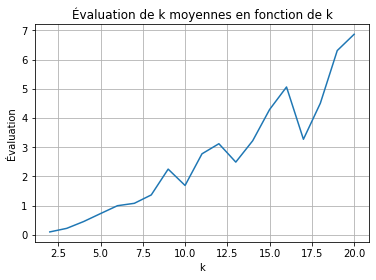

In [71]:

fig, ax = plt.subplots()
ax.grid(True)
ax.set_axisbelow(True)
ax.plot(tabEval)
ax.set_xlabel("k")
ax.set_ylabel("Évaluation")
ax.set_title("Évaluation de k moyennes en fonction de k");



L'index de DUNN étant le rapport entre la distance maximum qui sépare deux éléments classés ensemble et la distance minimum qui sépare deux éléments classés séparément. Notre but est donc de le minimiser.
On remarque que la valeur *k=4* donne de bonnes évaluations de façon consistante ce qui n'est pas abérant étant donnée qu'on a 4 notes de qualités différentes.

On re-calcule alors les centres et les affectations avec k = 4. On fait une représentation 2D des résultats à l’aide de la méthode Isomap du module sklearn.manifold, qui est une extension de la méthode de multidimensional scaling (MDS) en utilisant la distance sur un graphe de voisins de chaque point. On a utilisé un graphe basé sur les 4 plus proches voisins (paramètre par défaut de sklearn.manifold.Isomap) et une projection en dimension 2.

In [72]:

centres, affectation = Km.kmoyennes(4, data_norm, 0.05, 100)


In [73]:

tabTo2D = np.concatenate((data_norm.values, centres)) # Ajout des centres pour la projection 2D.
dessin = man.Isomap()
tab2D = dessin.fit_transform(tabTo2D)


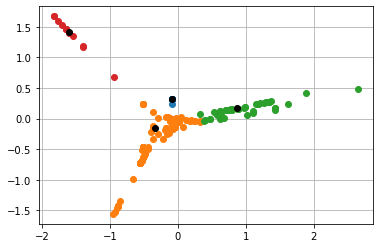

In [74]:


fig, ax = plt.subplots()
ax.grid(True)
ax.set_axisbelow(True)
for i in affectation:
    ax.scatter(tab2D[affectation[i], 0], tab2D[affectation[i], 1])
# Les centres sont les dernières cases de tab2D, tracées en noir.
ax.scatter(tab2D[-len(affectation):, 0], tab2D[-len(affectation):, 1], color="black");



L’algorithme k moyennes arrive ainsi à bien catégoriser les points. Les quelques points un peu inconsistants qu’on observe, par exemple des poins d’une couleur trop proches des groupes de points d’une autre couleur, peuvent être expliqués par les limitations de la méthode de projection 2D.

## 2.2 - Clustering hiérarchique : 


Encore dans les algorithmes de catégorisation, on a testé l’algorithme de clustering hiérarchique avec le même objectif de la partie précédente : étant donnés les aliments d’un groupe, catégoriser ces aliments en fonction de leur note de qualité (DQR), Score EF et leurs indicateurs environnementaux.
Pour cette analyse, on a choisi un autre groupe celui de *matières grasses*. Comme avant, on commence par extraire ses aliments de la base de données.


In [75]:
######extraire les aliments du groupe aides culinaires et ingrédients divers
cols = list(data_synthese)[11:]#on prend tous les attributs numériques
data = data_synthese[cols]

dataC = data[data_synthese["Groupe d'aliment"]=="matières grasses"].reset_index()
del dataC["index"]
dataC.head(10)

,DQR - Note de qualité de la donnée (1 excellente ; 5 très faible),Score unique EF (mPt/kg de produit),Changement climatique (kg CO2 eq/kg de produit),Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit),Rayonnements ionisants (kBq U-235 eq/kg de produit),Formation photochimique d'ozone (E-03 kg NMVOC eq/kg de produit),Particules (E-06 disease inc./kg de produit),Acidification terrestre et eaux douces (mol H+ eq/kg de produit),Eutrophisation terreste (mol N eq/kg de produit),Eutrophisation eaux douces (E-03 kg P eq/kg de produit),Eutrophisation marine (E-03 kg N eq/kg de produit),Utilisation du sol (Pt/kg de produit),Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit),Épuisement des ressources eau (m3 depriv./kg de produit),Épuisement des ressources énergétiques (MJ/kg de produit),Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit)
0,3.65,1.151473,15.491010,0.514036,0.797570,25.420398,0.841867,0.110315,0.456656,1.919732,37.613339,481.869610,97.219264,9.941610,56.231855,17.743524
1,3.65,1.152012,15.494353,0.514279,0.798645,25.430387,0.842032,0.110343,0.456710,1.923758,37.619118,481.901680,97.359031,9.944774,56.282938,17.836066
2,3.65,1.151473,15.491010,0.514036,0.797570,25.420398,0.841867,0.110315,0.456656,1.919732,37.613339,481.869610,97.219264,9.941610,56.231855,17.743524
3,2.69,1.152012,15.494353,0.514279,0.798645,25.430387,0.842032,0.110343,0.456710,1.923758,37.619118,481.901680,97.359031,9.944774,56.282938,17.836066
4,2.69,1.152012,15.494353,0.514279,0.798645,25.430387,0.842032,0.110343,0.456710,1.923758,37.619118,481.901680,97.359031,9.944774,56.282938,17.836066
5,2.69,1.151473,15.491010,0.514036,0.797570,25.420398,0.841867,0.110315,0.456656,1.919732,37.613339,481.869610,97.219264,9.941610,56.231855,17.743524
6,3.17,1.151473,15.491010,0.514036,0.797570,25.420398,0.841867,0.110315,0.456656,1.919732,37.613339,481.869610,97.219264,9.941610,56.231855,17.743524
7,2.53,1.669921,26.580789,0.957947,0.448884,40.782494,0.476876,0.059381,0.224992,1.799095,86.320674,206.324350,731.765290,9.806668,50.040058,21.115907
8,2.96,0.200600,1.447145,0.159744,0.403975,4.349464,0.164070,0.022964,0.093745,0.314636,5.398584,65.522522,36.212912,1.324480,22.264861,2.520080
9,2.96,0.200600,1.447145,0.159744,0.403975,4.349464,0.164070,0.022964,0.093745,0.314636,5.398584,65.522522,36.212912,1.324480,22.264861,2.520080


In [76]:
###normalisation des données
data_normC = clust.normalisation(dataC)
data_normC.head(10)

,DQR - Note de qualité de la donnée (1 excellente ; 5 très faible),Score unique EF (mPt/kg de produit),Changement climatique (kg CO2 eq/kg de produit),Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit),Rayonnements ionisants (kBq U-235 eq/kg de produit),Formation photochimique d'ozone (E-03 kg NMVOC eq/kg de produit),Particules (E-06 disease inc./kg de produit),Acidification terrestre et eaux douces (mol H+ eq/kg de produit),Eutrophisation terreste (mol N eq/kg de produit),Eutrophisation eaux douces (E-03 kg P eq/kg de produit),Eutrophisation marine (E-03 kg N eq/kg de produit),Utilisation du sol (Pt/kg de produit),Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit),Épuisement des ressources eau (m3 depriv./kg de produit),Épuisement des ressources énergétiques (MJ/kg de produit),Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit)
0,0.781726,0.653563,0.564641,0.470491,0.998011,0.589422,0.803523,0.711053,0.666877,0.421815,0.407403,0.148625,0.109299,0.254222,0.998702,0.828575
1,0.781726,0.653923,0.564773,0.470781,1.000000,0.589689,0.803700,0.711260,0.666964,0.422814,0.407473,0.148635,0.109496,0.254308,1.000000,0.833279
2,0.781726,0.653563,0.564641,0.470491,0.998011,0.589422,0.803523,0.711053,0.666877,0.421815,0.407403,0.148625,0.109299,0.254222,0.998702,0.828575
3,0.294416,0.653923,0.564773,0.470781,1.000000,0.589689,0.803700,0.711260,0.666964,0.422814,0.407473,0.148635,0.109496,0.254308,1.000000,0.833279
4,0.294416,0.653923,0.564773,0.470781,1.000000,0.589689,0.803700,0.711260,0.666964,0.422814,0.407473,0.148635,0.109496,0.254308,1.000000,0.833279
5,0.294416,0.653563,0.564641,0.470491,0.998011,0.589422,0.803523,0.711053,0.666877,0.421815,0.407403,0.148625,0.109299,0.254222,0.998702,0.828575
6,0.538071,0.653563,0.564641,0.470491,0.998011,0.589422,0.803523,0.711053,0.666877,0.421815,0.407403,0.148625,0.109299,0.254222,0.998702,0.828575
7,0.213198,1.000000,1.000000,1.000000,0.352307,1.000000,0.411627,0.345923,0.294064,0.391867,1.000000,0.062547,1.000000,0.250566,0.841415,1.000000
8,0.431472,0.018171,0.013312,0.047882,0.269145,0.026265,0.075761,0.084863,0.082851,0.023354,0.015463,0.018562,0.023666,0.020766,0.135853,0.054736
9,0.431472,0.018171,0.013312,0.047882,0.269145,0.026265,0.075761,0.084863,0.082851,0.023354,0.015463,0.018562,0.023666,0.020766,0.135853,0.054736


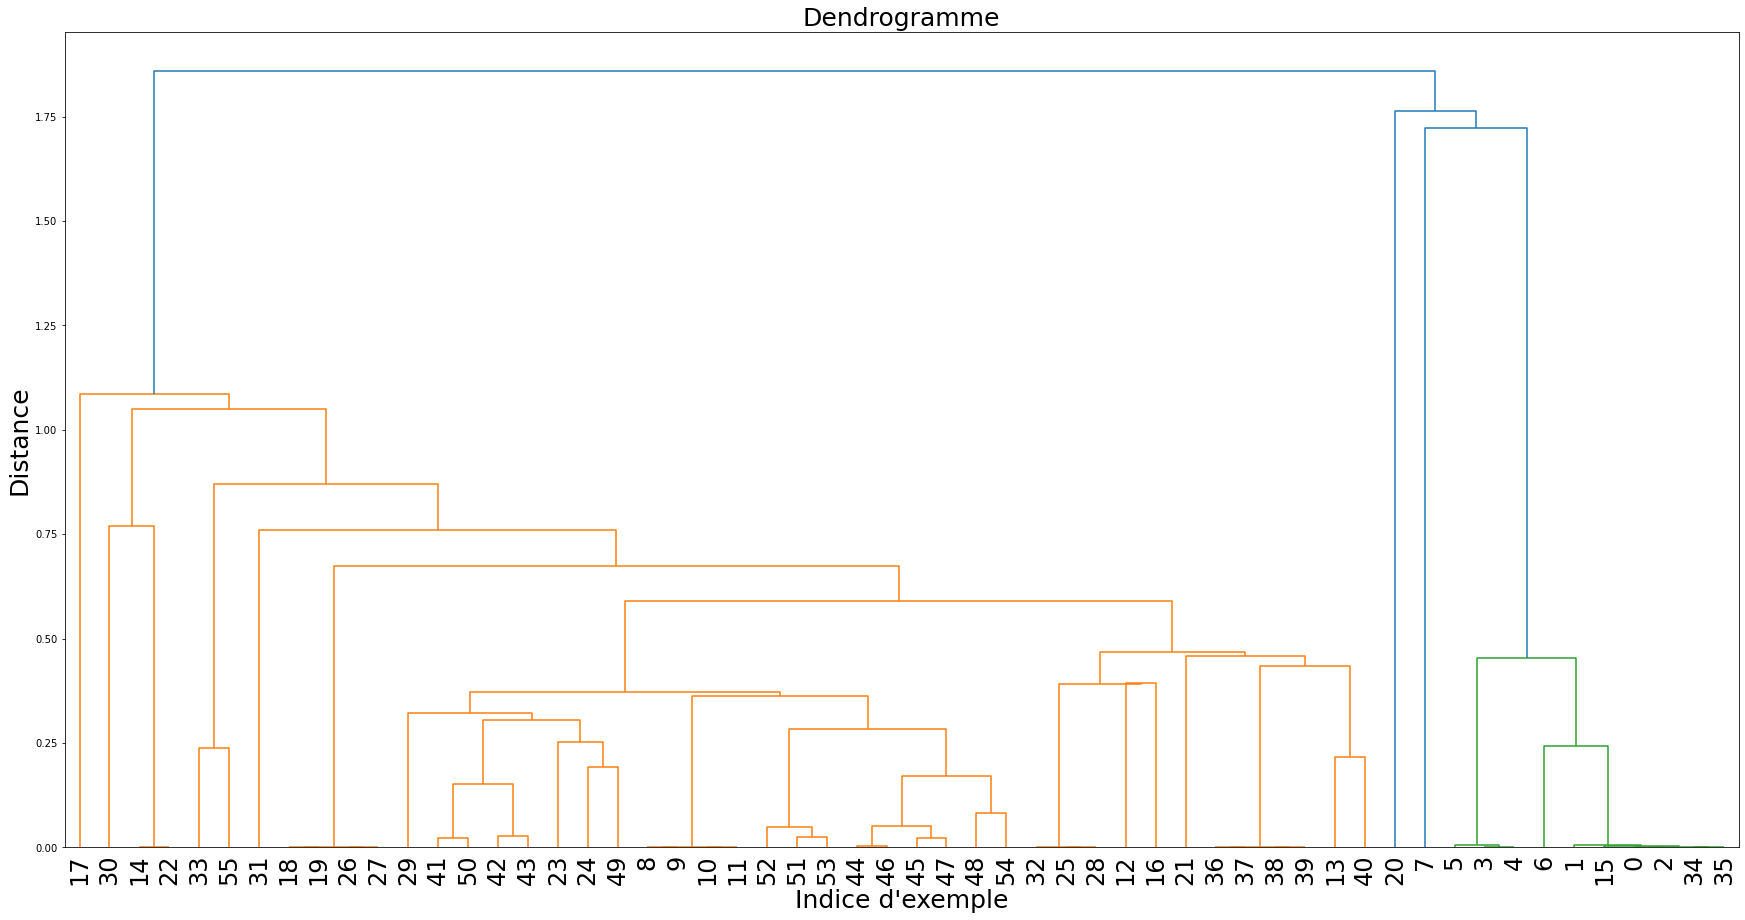

In [77]:
res = clust.clustering_hierarchique(data_normC,verbose=False,dendrogramme=True)

Comme l’algorithme de clustering hiérarchique est déterministe, les résultats ne changent pas d’une exécution à l’autre, ce qui permet de commenter les résultats avec plus de détails.
On remarque que la coloration automatique a identifié trois classes : une grande classe en orange, des classes plus petites en vert, bleus, représentés en bleu ainsi que des singletons (7 et 20).